In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

In [2]:
with open("train.dat", "r") as fh:
    lines = fh.readlines() 
    #print(lines)

In [3]:
L=[]
for d in lines:
    L.append(d.split())

In [4]:
Doc=[]
for row in L:
    temp=[]
    for x in row:
        temp.append(int(x))
    Doc.append(temp)
        
       

In [5]:
#Doc[0]

In [6]:
Doc[0][2+1]

1

In [130]:
len(Doc)

8580

In [131]:
uq=0
for k in Doc:
    uq=uq+(len(k)/2)
rows=len(Doc)
cols=126373
uq=int(uq)
print(uq)
ind=np.zeros(uq, dtype=np.int)
ct=np.zeros(uq, dtype=np.double)
mar=np.zeros(len(Doc)+1, dtype=np.int)
j=0
n=0
for d in Doc:
    w=len(d)
    for i in range(0,len(d),2):
        k=int(i/2)
        #print(k)
        ind[k+n]=d[i]
        ct[k+n]=d[i+1]
    mar[j+1]=mar[j]+int(w/2)
    j=j+1
    n=n+int(w/2)
    #print(w/2)
mat=csr_matrix((ct,ind,mar),shape=(rows,cols), dtype=np.double)
mat.sort_indices()
#print((mat))
print(mat)
 
        
        
        
        
        

1107980


<ipython-input-131-b2fadaee46a9>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ind=np.zeros(uq, dtype=np.int)
<ipython-input-131-b2fadaee46a9>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mo

  (0, 4)	3.0
  (0, 6)	1.0
  (0, 20)	1.0
  (0, 22)	1.0
  (0, 30)	5.0
  (0, 35)	1.0
  (0, 41)	1.0
  (0, 46)	1.0
  (0, 49)	1.0
  (0, 61)	1.0
  (0, 69)	1.0
  (0, 78)	1.0
  (0, 85)	1.0
  (0, 105)	1.0
  (0, 117)	2.0
  (0, 121)	1.0
  (0, 135)	1.0
  (0, 142)	1.0
  (0, 145)	2.0
  (0, 169)	4.0
  (0, 175)	3.0
  (0, 205)	1.0
  (0, 206)	1.0
  (0, 210)	1.0
  (0, 262)	3.0
  :	:
  (8579, 7908)	1.0
  (8579, 8138)	1.0
  (8579, 8142)	1.0
  (8579, 8256)	1.0
  (8579, 10117)	1.0
  (8579, 10195)	1.0
  (8579, 10797)	1.0
  (8579, 11606)	1.0
  (8579, 11747)	1.0
  (8579, 12468)	1.0
  (8579, 12537)	1.0
  (8579, 12901)	1.0
  (8579, 13113)	2.0
  (8579, 13189)	1.0
  (8579, 13719)	1.0
  (8579, 13938)	1.0
  (8579, 13939)	1.0
  (8579, 19752)	1.0
  (8579, 21044)	1.0
  (8579, 22592)	1.0
  (8579, 25101)	1.0
  (8579, 27641)	1.0
  (8579, 32303)	1.0
  (8579, 49115)	2.0
  (8579, 85241)	3.0


In [132]:
#print(mat)
r=mat.shape[0]
nnz = mat.nnz
ind, val, ptr = mat.indices, mat.data, mat.indptr
df=defaultdict(int)
for i in ind:
    df[i] += 1
# inverse document frequency
for k,v in df.items():
    df[k] = np.log(r / float(v))  ## df turns to idf - reusing memory
# scale by idf
for i in range(0, nnz):
    val[i] *= df[ind[i]]
'''for i in range(r):
    rsum = 0.0    
    for j in range(ptr[i], ptr[i+1]):
        rsum += val[j]**2
    if rsum == 0.0:
        continue  # do not normalize empty rows
    rsum = 1.0/np.sqrt(rsum)
    for j in range(ptr[i], ptr[i+1]):
        val[j] *= rsum

print(mat[0])
#norm_mat=preprocessing.normalize(mat)'''

'for i in range(r):\n    rsum = 0.0    \n    for j in range(ptr[i], ptr[i+1]):\n        rsum += val[j]**2\n    if rsum == 0.0:\n        continue  # do not normalize empty rows\n    rsum = 1.0/np.sqrt(rsum)\n    for j in range(ptr[i], ptr[i+1]):\n        val[j] *= rsum\n\nprint(mat[0])\n#norm_mat=preprocessing.normalize(mat)'

In [133]:
#print(norm_mat)
X=mat[0].toarray()[0]
s=0
for i in X:
    s=s+(i**2)
s    

6296.564795611819

In [134]:
svd = TruncatedSVD(n_components=150)
mat1=svd.fit_transform(mat)


In [135]:
mat1[0].shape

(150,)

In [136]:
s=0
for i in mat1[0]:
    s=s+(i**2)
s

848.5783633735977

In [137]:
#mat1[0.0]

In [138]:
mat2=preprocessing.normalize(mat1,axis=1)

In [139]:
s=0
for i in mat2[0]:
    s=s+(i**2)
s

1.0

In [140]:
from sklearn.cluster import KMeans

In [141]:
display(mat2[0])

array([ 0.26579287, -0.1718538 , -0.01907954, -0.06719667,  0.10489349,
        0.03168274,  0.05811629, -0.09867117, -0.04047651,  0.07532752,
       -0.18556916,  0.20224977,  0.12645731,  0.0187294 , -0.11049219,
       -0.08780574, -0.04572768, -0.16314717,  0.04453398,  0.15621177,
       -0.02073082, -0.0589379 , -0.09860155,  0.04200501,  0.05070842,
       -0.12248386, -0.00353899, -0.07244837, -0.05920054, -0.0791057 ,
        0.03467022, -0.0199413 ,  0.02163613, -0.04560938, -0.10471432,
       -0.00333218,  0.08903909, -0.00080278, -0.1084413 , -0.00135885,
        0.16407135, -0.08025754, -0.0235093 ,  0.10504878, -0.07004217,
        0.05289117, -0.04545088, -0.10036819,  0.13612611, -0.0669281 ,
        0.06787423,  0.01960851, -0.16842978, -0.12581732,  0.10346603,
       -0.06052494,  0.06298194,  0.03889335,  0.05438617, -0.0892544 ,
       -0.20516494,  0.09313202, -0.06915606,  0.09589386,  0.00254239,
        0.06619606,  0.02566678,  0.00645388,  0.04815515,  0.05

In [142]:
kx=KMeans(2).fit(mat2)

In [143]:
kx.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [144]:
kx.inertia_

7163.254729141701

In [145]:
#kx.cluster_centers_
print(mat2[0])

[ 0.26579287 -0.1718538  -0.01907954 -0.06719667  0.10489349  0.03168274
  0.05811629 -0.09867117 -0.04047651  0.07532752 -0.18556916  0.20224977
  0.12645731  0.0187294  -0.11049219 -0.08780574 -0.04572768 -0.16314717
  0.04453398  0.15621177 -0.02073082 -0.0589379  -0.09860155  0.04200501
  0.05070842 -0.12248386 -0.00353899 -0.07244837 -0.05920054 -0.0791057
  0.03467022 -0.0199413   0.02163613 -0.04560938 -0.10471432 -0.00333218
  0.08903909 -0.00080278 -0.1084413  -0.00135885  0.16407135 -0.08025754
 -0.0235093   0.10504878 -0.07004217  0.05289117 -0.04545088 -0.10036819
  0.13612611 -0.0669281   0.06787423  0.01960851 -0.16842978 -0.12581732
  0.10346603 -0.06052494  0.06298194  0.03889335  0.05438617 -0.0892544
 -0.20516494  0.09313202 -0.06915606  0.09589386  0.00254239  0.06619606
  0.02566678  0.00645388  0.04815515  0.0585418  -0.00226411  0.08615698
 -0.03392006  0.03881932  0.03047417  0.03936166 -0.1153005  -0.00336613
 -0.05289303 -0.05208906  0.07275808  0.06979326 -0.0

In [146]:
a=np.array([[1,2,100],[8,7,200],[9,10,100]])
print(a[:,0:-1])
k=KMeans(2).fit(a[:,0:-1])
k.labels_
k.cluster_centers_


[[ 1  2]
 [ 8  7]
 [ 9 10]]


array([[8.5, 8.5],
       [1. , 2. ]])

In [147]:
(k.labels_)

array([1, 0, 0], dtype=int32)

In [148]:
#a=a[[False,True,True]]
#print(a)
#print(a[0])
a=a[k.labels_==1]
#k.labels_==0

In [149]:
test={}
test[0]=np.array(a)

In [150]:
h=test[0]

h=[[1,2,4]]
print(test[0])


[[  1   2 100]]


In [151]:
#ine=0
#for i in range(0,len(k.labels_)):
#    X=a[i]
#    Y=k.cluster_centers_[k.labels_[i]]
#    print(np.square(X-Y).sum())
#ine    
l=[]
l.append(2)
print(l)

[2]


In [152]:

X=mat2
#print(X[0])
#for i in range(0,len(X)):
#    X[i].append(i+1)

#print(X[0])'''
#p=np.array([[0,1,2,3],[4,5,6,7]])
#for i in range(0,len(p)):
#    p[i,-1]=i
#p[:,0:-1]

#X=mat2
#print(X[1])
for i in range(0,len(X)):
    X[i,-1]=(i+1)
#print(len(X[:,-1]))
#X=np.array([[5,6],[2,3],[7,9],[10,12]])
#kx=KMeans(n_clusters=2).fit(X)
#X[kx.labels_==0]
#ONE=[]
#ZERO=[]
#for i in range(0,len(kx.labels_)):
#    if(kx.labels_[i]==0):
 #       ZERO.append(X[i])
  #  else:

   #     ONE.append(X[i])
#print(ZERO)  
#print(ONE)

In [153]:

    
    
doc_cluster={}
k=1
sse={}
sseplot=[]
n_mask=[]

TEST=True

while(k<=5):
    #code for k means
    #print(doc_cluster)
    #print(X)
    kx=KMeans(n_clusters=2).fit(X[:,0:-1])
    k=k+1
    zero=0
    one=1
    #print(kx.labels_)
    for i in range(0,6):
        if i not in n_mask:
            zero=i
            n_mask.append(i)
            break
    for i in range(0,6):
        if i not in n_mask:
            one=i
            n_mask.append(i)
            break
    sse[zero]=0
    sse[one]=0
    
    for i in range(0,len(kx.labels_)):
        #print(i)
        x=X[i,0:-1]
        y=kx.cluster_centers_[kx.labels_[i]]
        z=np.square(x-y).sum()
        if(kx.labels_[i]==0):
            sse[zero]=sse[zero]+z
        else:
            sse[one]=sse[one]+z
    #print(X[kx.labels_==0])
    doc_cluster[zero]=X[kx.labels_==0]
    doc_cluster[one]=X[kx.labels_==1]
    plot_sum=0
    for key in sse:
        plot_sum+=sse[key]
    sseplot.append(plot_sum)
    no_chosen_val=-1
    no_chosen=-1
    for key in sse:
        if(sse[key]>no_chosen_val):
            no_chosen_val=sse[key]
            no_chosen=key
    #print(no_chosen)
    del(sse[no_chosen])
    if(TEST==True):
        #print(len(doc_cluster[0]))
        #print(len(doc_cluster[1]))
        TEST=False
    X=doc_cluster[no_chosen]
    #print((X[:,-1]))
    del(doc_cluster[no_chosen])
    for j in range(0,len(n_mask)):
        if(n_mask[j]==no_chosen):
            del(n_mask[j])
            break
    #print(doc_cluster)
print(sseplot)
        
        
        
            
            
            
    
    
    
    
    
    
    
    
    
    
    
    
    
    

[7132.914234313334, 6873.206960377709, 6673.537301272452, 6499.421832135757, 6386.348500851681]


In [154]:
#print(len(doc_cluster[20]))
for key in doc_cluster:
    print(key)

0
3
2
4
5


In [155]:
l=[None]*8581
len(l)

8581

In [156]:
count=0
for key in doc_cluster:
    count=count+len(doc_cluster[key])
        
count            
        

5596

In [157]:

Li=doc_cluster[20]
print((Li[-1]))
print(len(Li))       

KeyError: 20

In [158]:
print(len(X))

2984


In [159]:
print(count+len(X))

8580


In [160]:
print(no_chosen)

1


In [161]:
print(doc_cluster)

{0: array([[ 3.75980544e-01, -2.13069442e-01,  1.38460489e-01, ...,
        -5.74570244e-02,  2.04462979e-02,  3.11800000e+03],
       [ 2.97882384e-01, -8.79675382e-02,  1.08164491e-01, ...,
         2.23889112e-02,  1.22231892e-02,  3.67300000e+03],
       [ 3.00920846e-01, -5.25285675e-02,  5.52161824e-02, ...,
        -6.10321889e-02,  3.30314319e-03,  7.16900000e+03],
       ...,
       [ 3.24496904e-01, -5.49829116e-02,  7.58220709e-02, ...,
         5.68156969e-03, -2.51370125e-02,  7.97400000e+03],
       [ 4.06668300e-01, -1.32266329e-02,  9.84253291e-02, ...,
        -2.65652433e-02,  2.04643945e-02,  7.97600000e+03],
       [ 2.94843360e-01, -6.33709699e-02,  7.70734859e-02, ...,
        -3.75384528e-02, -1.67876638e-02,  7.97700000e+03]]), 3: array([[ 3.55284000e-01, -1.48391605e-01,  1.67087258e-01, ...,
         8.09502495e-02,  1.75177275e-03,  3.41300000e+03],
       [ 3.21742789e-01, -1.60125179e-01,  1.32207494e-01, ...,
         3.99520322e-02, -3.03448728e-02,  3.41

In [162]:
print(X)

[[ 2.65792866e-01 -1.71853805e-01 -1.90795408e-02 ...  5.04794248e-02
  -1.54497963e-03  1.00000000e+00]
 [ 3.01083864e-01 -1.96693109e-01  3.04730519e-03 ...  7.78043989e-02
  -1.03632931e-01  3.00000000e+00]
 [ 3.28769456e-01 -1.90842861e-01 -7.96196481e-02 ...  1.32375607e-02
  -2.17671675e-02  4.00000000e+00]
 ...
 [ 2.86226413e-01 -1.55549377e-01  4.19375841e-02 ... -1.58082071e-02
   5.08260784e-02  5.91000000e+03]
 [ 4.41524774e-01 -2.97254262e-01 -1.88137941e-01 ... -3.10497783e-02
  -3.00956134e-02  6.56400000e+03]
 [ 1.98152555e-01 -1.26397784e-01 -4.36012911e-02 ... -4.26850869e-03
  -6.77999174e-03  6.65200000e+03]]


In [163]:
doc_cluster[no_chosen]=X

In [164]:
for key in doc_cluster:
    for L in doc_cluster[key]:
        print
        l[int(L[-1])]=key

In [165]:
for i in l:
    if i is None:
        print(i)

None


In [166]:
print(l[0])

None


In [167]:
txtf=open("result1.txt","w")

In [168]:
for i in l[1:]:
    txtf.write(str(i)+"\n")

In [169]:
print(l[8579])

4


In [170]:
txtf.close()

In [171]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SSE')

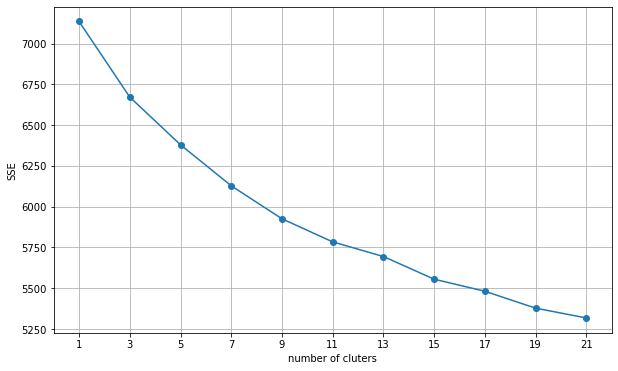

In [63]:
plt.figure(figsize=(10,6))
x_co=[0,2,4,6,8,10,12,14,16,18,20]
plt.plot(x_co,sseplot[0::2],marker='o')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20],[1,3,5,7,9,11,13,15,17,19,21])
plt.grid()
plt.xlabel("number of cluters")
plt.ylabel("SSE")